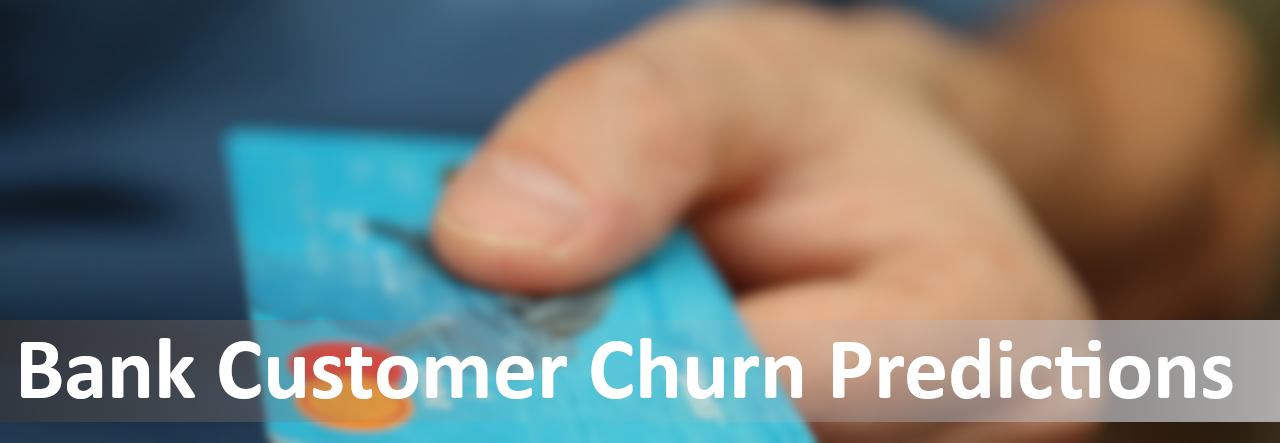

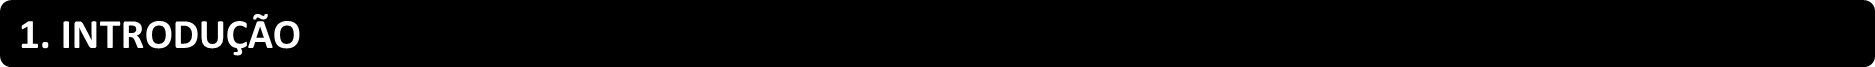

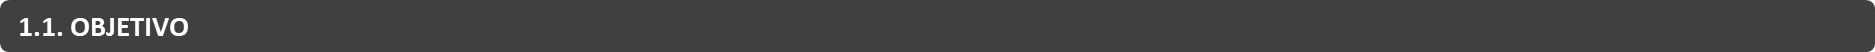

***


Para o presente projeto, selecionei um *Dataset* disponível no site do [kaggle](https://www.kaggle.com/datasets/santoshd3/bank-customers), no qual são apresentados dez mil registros de clientes de um determinado banco, cada registro contém catorze *features* descrevendo suas características, tais como Idade, Gênero, Score e se o cliente "deixou" o banco ao final de um período determinado.


O objetivo aqui será aplicar técnicas de *Machine Learning* para prever a possibilidade de um dado cliente encerrar sua conta com o banco. Para tanto, utilizarei diversos algoritmos de classificação, visando obter o melhor resultado para as seguintes métricas:


* Acurácia (*accuracy*): que determina a quantidade de acertos, independente da classe;
* Precisão (*precision*): definida pela razão entre a quantidade de acertos positivos e o total de dados classificados como positivos; e
* Curva ROC (*Receiver Operating Characteristic*): "*mede-se a área sob uma curva formada pelo gráfico entre a taxa de exemplos positivos, que realmente são positivos, e a taxa de falsos positivos.*"  Cito [Mario Filho](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/).

Também aproveitei para realizar testes quanto aos modos de escalonamento de variáveis, utilizando as técnicas de Min Max Scaler, Standard Scaler e Robust Scaler, detalhadas mais adiante, com a intenção de verificar se haverão diferenças consideráveis entre as técnicas aplicadas.

Ao final, além de tentarmos obter os melhores resultados de acordo com as métricas pré estipuladas, também iremos verificar quais são as *features* mais importantes que o modelo determinou.



***

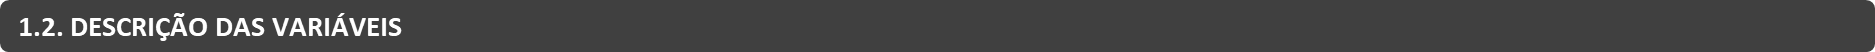

|     **Feature**     	|                     **Description**                    	|
|:-------------------:	|:------------------------------------------------------:	|
|    **RowNumber**    	|            Corresponde ao registro da linha.           	|
|    **CustomerId**   	|                 ID do cliente no banco.                	|
|     **Surname**     	|                    Sobrenome do cliente.                    	|
|   **CreditScore**   	|                    Score do cliente.                   	|
|    **Geography**    	|                    País do cliente.                    	|
|      **Gender**     	|                   Gênero do cliente.                   	|
|       **Age**       	|                    Idade do cliente.                   	|
|      **Tenure**     	| Refere-se a quantidade de anos do cliente com o banco. 	|
|     **Balance**     	|                    Saldo do cliente.                   	|
|  **NumOfProducts**  	|  Número de produtos que o cliente possui com o banco.  	|
|    **HasCrCard**    	|      Indica se o cliente possui cartão de crédito.     	|
|  **IsActiveMember** 	|          Informa se o cliente é ativo ou não.          	|
| **EstimatedSalary** 	|              Salário estimado do cliente.              	|
|      **Exited**     	|       Informa se o cliente deixou ou não o banco.      	|

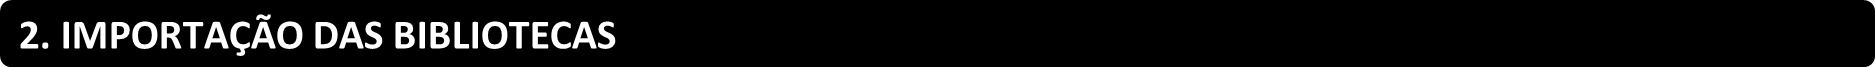

In [1]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import warnings

from sklearn.preprocessing   import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier
from xgboost                 import XGBClassifier
from sklearn.metrics         import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics         import precision_score, classification_report, confusion_matrix
from sklearn.neural_network  import MLPClassifier
from lightgbm                import LGBMClassifier

from tqdm                    import tqdm

warnings.filterwarnings('ignore')
%matplotlib inline

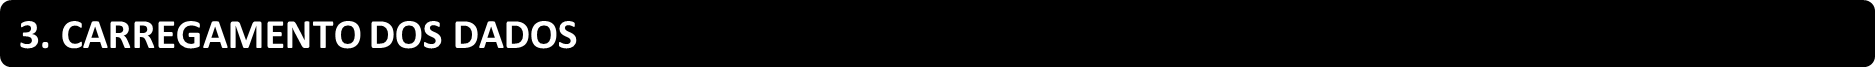

In [2]:
df = pd.read_csv('Arquivos/churn.csv')

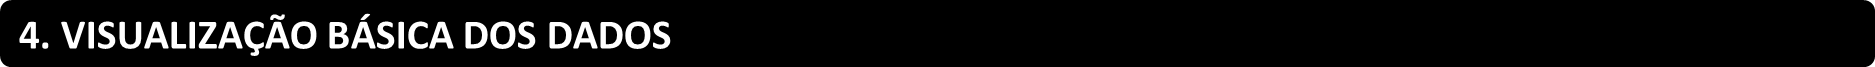

In [3]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
print(f'O Dataset possui \033[1m{df.shape[0]}\033[0m linhas por \033[1m{df.shape[1]} colunas\033[0m.')

O Dataset possui 10000 linhas por 14 colunas.


In [5]:
print(f'Quantidade de Valores Duplicados: \033[1m{df.duplicated().sum()}\033[0m.')

Quantidade de Valores Duplicados: 0.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
display(df.describe(), df.describe(include='O'))

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


***


Observa-se após uma análise básica sobre os dados que não há valores duplicados, bem como a inexistência de valores ausentes.


***

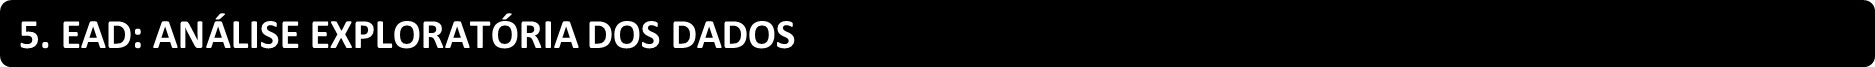

In [8]:
# Divisão da base entre clientes e ex clientes
df_churn = df[df['Exited'] == 1]
df_non_churn = df[df['Exited'] == 0]

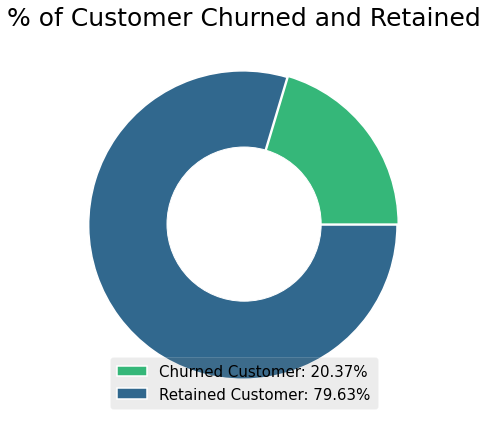

In [9]:
fig, grafico = plt.subplots(figsize=(18, 6))

porc_churn = f'Churned Customer: {np.round(len(df_churn) / len(df) * 100, 2)}%'
porc_non_churn = f'Retained Customer: {np.round(len(df_non_churn) / len(df) * 100, 2)}%'

colors = sns.color_palette('viridis_r', 2)
grafico.pie(sorted(df['Exited'].value_counts()), wedgeprops={'linewidth':1.5, 'edgecolor': 'w'}, colors=colors, explode= (0, 0.01))
grafico.set_title('% of Customer Churned and Retained', fontsize=25)
circulo = plt.Circle((0,0), 0.5, color='white', ec='w')
grafico.add_artist(circulo)
grafico.legend((porc_churn, porc_non_churn), loc=8, fontsize=15, borderpad = 0.5,
              labelspacing = 0.5, edgecolor = 'w', facecolor = 'gray', framealpha = 0.15)
plt.tight_layout()

***


Podemos observar que a base de dados encontra-se desbalanceada, contendo quase 80% de pessoas que ainda permanecem clientes do banco. Contudo é um valor aceitável, uma vez que a proporção de pessoas que continuam utilizando os serviços do banco, via de regra, será maior do que as que deixaram de utilizar os serviços.


***

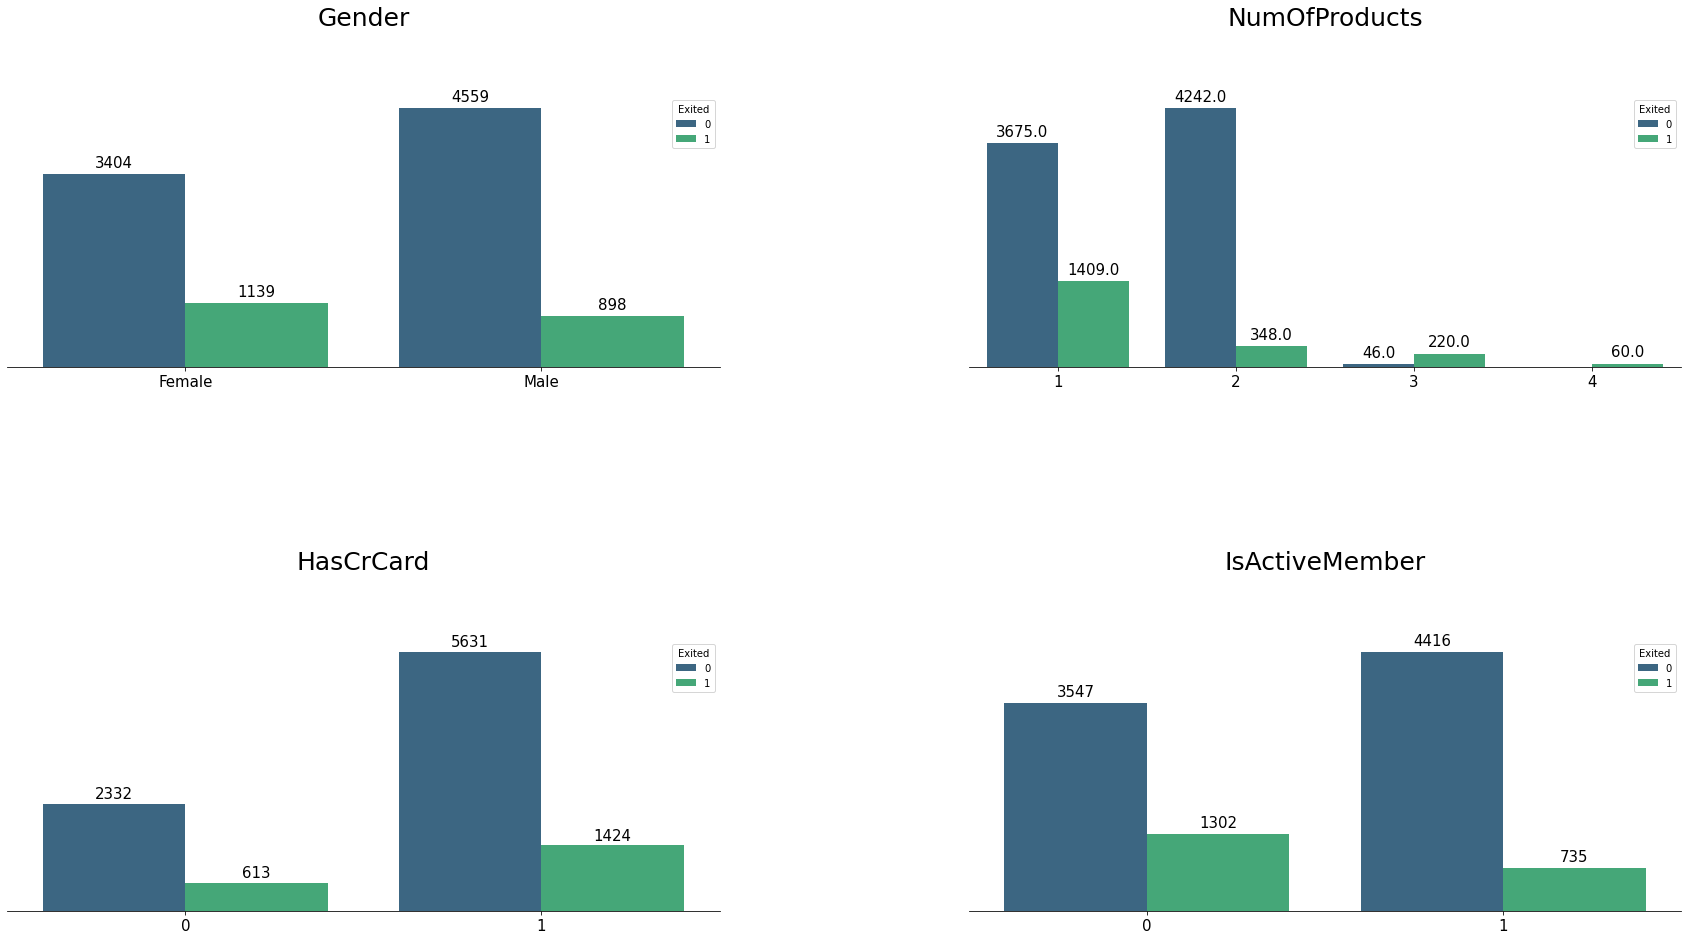

In [10]:
figura = plt.figure(figsize=(30, 15))
plt.subplots_adjust(hspace = 1, wspace = 0.35)

features = ['Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for grafico in range(0, len(features)):
    figura.add_subplot(2, 2, grafico+1)
    gra = sns.countplot(x=features[grafico], hue='Exited', data=df, dodge=True, palette='viridis')
    gra.set_title(features[grafico], fontsize=25, pad=70)
    
    gra.tick_params(axis='y', labelleft=False, left=None)
    gra.tick_params(axis='x', labelsize=15, labelbottom=True)
    gra.set_ylabel(''), gra.set_xlabel('')
    gra.set(yticklabels='')
    
    for axis in ['top', 'right', 'left']:        
        gra.spines[axis].set_color(None)
        
    for i in gra.patches:
        gra.annotate(i.get_height(),       
                    (i.get_x() + i.get_width() / 2, i.get_height() + 100),
                    ha='center', va='baseline',
                    xytext=(0, 1), textcoords='offset points', fontsize=15)

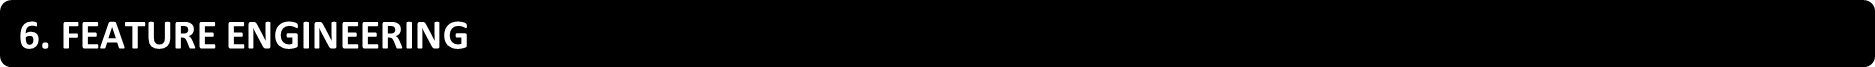

In [11]:
# Excluindo Features que não serão utilizadas
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

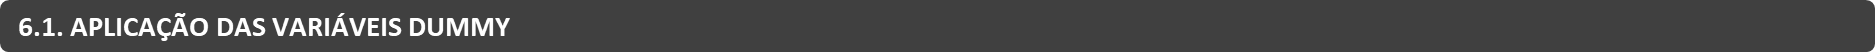

***


"Variável *Dummy*" é utilizada para representar uma variável com duas ou mais categorias. São usadas quando queremos adicionar dados categóricos em modelos que aceitam apenas dados numéricos. São variáveis binárias, basicamente indicam se um indíviduo pertece a um dado grupo ou não.


***

In [12]:
# Convertendo as variáveis
df_dummies = pd.get_dummies(df)
# Exibindo o novo DataFrame
df_dummies.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0


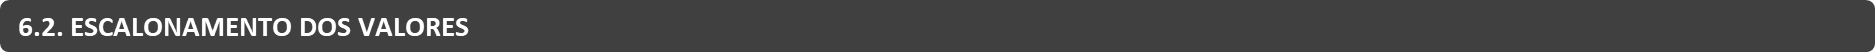

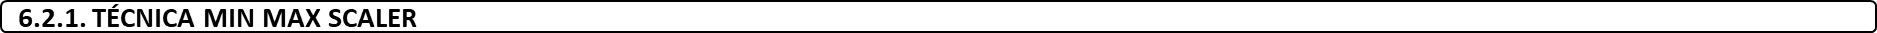

***


**MinMaxScaler** dimensiona todos os recursos de dados no intervalo [0, 1] ou então no intervalo [-1, 1] se houver valores negativos no conjunto de dados. Esta escala comprime todos os inliers na faixa estreita [0, 0,005]. 


***

In [13]:
scalerMS = MinMaxScaler()
df_dummiesMS = df_dummies.copy()
df_dummiesMS['CreditScore'] = scalerMS.fit_transform(df_dummies['CreditScore'].values.reshape(-1, 1))
df_dummiesMS['Age'] = scalerMS.fit_transform(df_dummies['Age'].values.reshape(-1, 1))
df_dummiesMS['Tenure'] = scalerMS.fit_transform(df_dummies['Tenure'].values.reshape(-1, 1))
df_dummiesMS['Balance'] = scalerMS.fit_transform(df_dummies['Balance'].values.reshape(-1, 1))
df_dummiesMS['NumOfProducts'] = scalerMS.fit_transform(df_dummies['NumOfProducts'].values.reshape(-1, 1))
df_dummiesMS['EstimatedSalary'] = scalerMS.fit_transform(df_dummies['EstimatedSalary'].values.reshape(-1, 1))

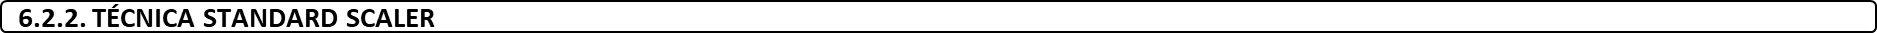

***


**StandardScaler** segue a distribuição normal padrão (SND) . Portanto, torna a média = 0 e dimensiona os dados para a variância da unidade. Na presença de outliers, o StandardScaler não garante escalas de recursos balanceadas, devido à influência dos outliers ao calcular a média empírica e o desvio padrão. Isso leva à redução na faixa dos valores do recurso.


***

In [14]:
scalerSS = StandardScaler()
df_dummiesSS = df_dummies.copy()
df_dummiesSS['CreditScore'] = scalerSS.fit_transform(df_dummies['CreditScore'].values.reshape(-1, 1))
df_dummiesSS['Age'] = scalerSS.fit_transform(df_dummies['Age'].values.reshape(-1, 1))
df_dummiesSS['Tenure'] = scalerSS.fit_transform(df_dummies['Tenure'].values.reshape(-1, 1))
df_dummiesSS['Balance'] = scalerSS.fit_transform(df_dummies['Balance'].values.reshape(-1, 1))
df_dummiesSS['NumOfProducts'] = scalerSS.fit_transform(df_dummies['NumOfProducts'].values.reshape(-1, 1))
df_dummiesSS['EstimatedSalary'] = scalerSS.fit_transform(df_dummies['EstimatedSalary'].values.reshape(-1, 1))

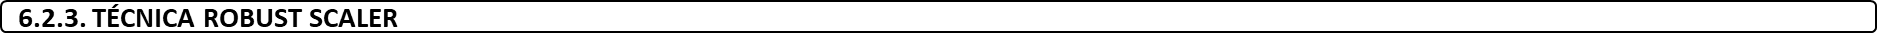

***


Usando **RobustScaler**, podemos remover os *outliers* e usar *StandardScaler* ou *MinMaxScaler* para pré-processar o conjunto de dados. Ele dimensiona recursos usando estatísticas robustas para *outliers*. Este método remove a mediana e dimensiona os dados no intervalo entre o 1º quartil e o 3º quartil . ou seja, entre o 25º quantil e o 75º quantil . Este intervalo também é denominado intervalo interquartil . 
A mediana e o intervalo interquartil são então armazenados para que possam ser usados em dados futuros usando o método de transformação. Se outliers estiverem presentes no conjunto de dados, então a mediana e o intervalo interquartil fornecem melhores resultados e superam a média e a variância da amostra. 

*Fonte: [acervolima.com](https://acervolima.com/tecnicas-standardscaler-minmaxscaler-e-robustscaler-ml/#:~:text=Usando%20RobustScaler()%2C%20podemos%20remover,processar%20o%20conjunto%20de%20dados.&text=Ele%20dimensiona%20recursos%20usando%20estat%C3%ADsticas,quartil%20e%20o%203%C2%BA%20quartil%20.)*


***

In [15]:
scalerRS = RobustScaler()
df_dummiesRS = df_dummies.copy()
df_dummiesRS['CreditScore'] = scalerRS.fit_transform(df_dummies['CreditScore'].values.reshape(-1, 1))
df_dummiesRS['Age'] = scalerRS.fit_transform(df_dummies['Age'].values.reshape(-1, 1))
df_dummiesRS['Tenure'] = scalerRS.fit_transform(df_dummies['Tenure'].values.reshape(-1, 1))
df_dummiesRS['Balance'] = scalerRS.fit_transform(df_dummies['Balance'].values.reshape(-1, 1))
df_dummiesRS['NumOfProducts'] = scalerRS.fit_transform(df_dummies['NumOfProducts'].values.reshape(-1, 1))
df_dummiesRS['EstimatedSalary'] = scalerRS.fit_transform(df_dummies['EstimatedSalary'].values.reshape(-1, 1))

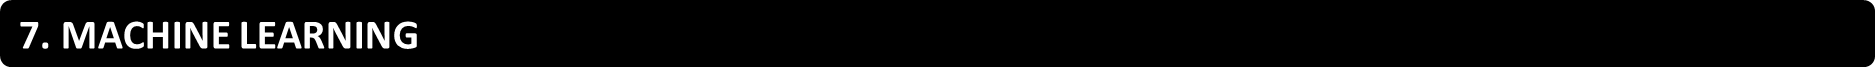

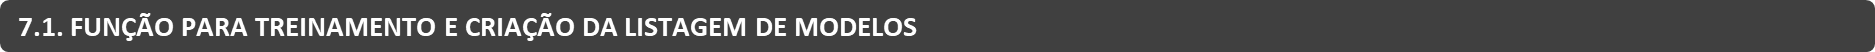

In [16]:
def trainModel(modelo, nome, tecnica):
    model = modelo
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test)   
    score = roc_auc_score(y_test, y_pred)*100
    acuracia = accuracy_score(y_pred, y_test)*100
    precisao = precision_score(y_test, y_pred, average='binary')*100
    return nome, tecnica, score, acuracia, precisao

In [17]:
listaModelos = [[LogisticRegression(), 'Regressão Logística'],
                [GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, random_state=0), 'Gradient Boosting Classifier'],
                [XGBClassifier(max_depth=2, learning_rate=0.2, n_estimators=200, random_state=0, eval_metric = 'logloss'), 'XGB Classifier'],
                [MLPClassifier(random_state=0), 'Redes Neurais'],
                [LGBMClassifier(random_state=0), 'LGBM Classifier'],
                [RandomForestClassifier(n_estimators=200, random_state=0), 'Random Forest']]
listaResultados = list()

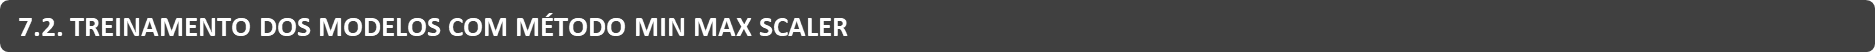

In [18]:
# Divisão da Base
X = df_dummiesMS.drop(['Exited'], axis=1)
y = df_dummiesMS['Exited'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

for modelo in tqdm(listaModelos):    
    listaResultados.append(trainModel(modelo[0], modelo[1], 'MinMaxScaler'))

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.38s/it]


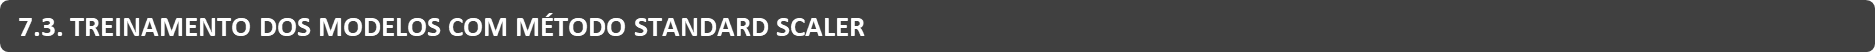

In [19]:
# Divisão da Base
X = df_dummiesSS.drop(['Exited'], axis=1)
y = df_dummiesSS['Exited'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

for modelo in tqdm(listaModelos):    
    listaResultados.append(trainModel(modelo[0], modelo[1], 'Standard Scaler'))

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.43s/it]


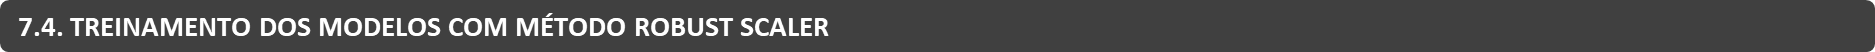

In [20]:
# Divisão da Base
X = df_dummiesRS.drop(['Exited'], axis=1)
y = df_dummiesRS['Exited'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

for modelo in tqdm(listaModelos):    
    listaResultados.append(trainModel(modelo[0], modelo[1], 'Robust Scaler'))

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.41s/it]


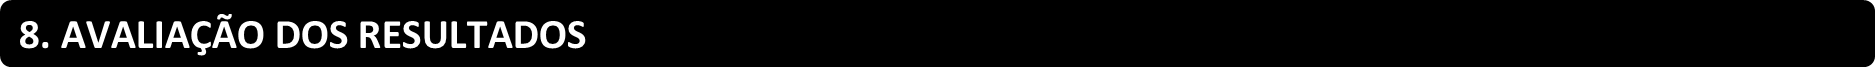

In [21]:
# Criação do Dataframe com os resultados obtidos durante o treinamento dos modelos
dfResultados = pd.DataFrame(listaResultados, columns=['Modelo', 'Tecnica', 'Curva ROC', 'Acuracia', 'Precisao'])
# Exibição do DataFrame, ordenado pelo Modelo
dfResultados.sort_values(by='Modelo').T

,1,13,7,4,16,10,17,5,11,15,3,9,0,6,12,14,2,8
Modelo,Gradient Boosting Classifier,Gradient Boosting Classifier,Gradient Boosting Classifier,LGBM Classifier,LGBM Classifier,LGBM Classifier,Random Forest,Random Forest,Random Forest,Redes Neurais,Redes Neurais,Redes Neurais,Regressão Logística,Regressão Logística,Regressão Logística,XGB Classifier,XGB Classifier,XGB Classifier
Tecnica,MinMaxScaler,Robust Scaler,Standard Scaler,MinMaxScaler,Robust Scaler,Standard Scaler,Robust Scaler,MinMaxScaler,Standard Scaler,Robust Scaler,MinMaxScaler,Standard Scaler,MinMaxScaler,Standard Scaler,Robust Scaler,Robust Scaler,MinMaxScaler,Standard Scaler
Curva ROC,74.160765,74.160765,74.160765,74.366655,74.519525,74.493982,73.980417,73.980417,73.764852,74.429351,73.196718,73.439762,59.290994,59.688842,59.688842,73.851155,73.851155,73.851155
Acuracia,86.7,86.7,86.7,86.0,85.95,86.35,87.0,87.0,86.95,86.1,85.75,85.55,81.2,81.1,81.1,86.5,86.5,86.5
Precisao,73.883162,73.883162,73.883162,69.592476,69.135802,71.290323,76.173285,76.173285,76.277372,70.031546,69.86755,68.471338,59.477124,58.181818,58.181818,73.195876,73.195876,73.195876


In [22]:
# Exibição do Dataframe, com a médias dos valores obtidos independente da técnica de escalonamento utilizada, ordenado pela métrica 'Curva ROC'
dfMedia = dfResultados.groupby(['Modelo']). mean().sort_values(by='Curva ROC').reset_index()
dfMedia.T

,0,1,2,3,4,5
Modelo,Regressão Logística,Redes Neurais,XGB Classifier,Random Forest,Gradient Boosting Classifier,LGBM Classifier
Curva ROC,59.556226,73.68861,73.851155,73.908562,74.160765,74.460054
Acuracia,81.133333,85.8,86.5,86.983333,86.7,86.1
Precisao,58.613587,69.456811,73.195876,76.207981,73.883162,70.006201


***


Acima, a apresentação da média dos resultados obtidos com o treinamento dos modelos, para ficar de uma forma mais fácil de compreender, plotarei os gráficos adiante, de cada uma das métricas utilizadas, comparando o desempenho dos diferentes algoritmos.


***

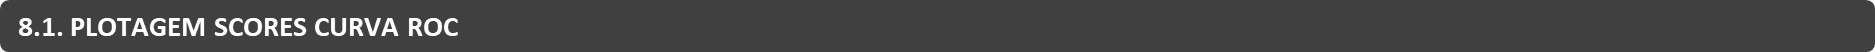

In [23]:
# Criação da função para plotagem dos gráficos
def plotarGrafico(titulo, df=dfResultados):
    dfMedia = df.groupby(['Modelo']). mean().sort_values(by=titulo).reset_index()
    x = dfMedia.Modelo
    y = dfMedia[titulo]
    fig, ax = plt.subplots(figsize=(30, 5))
    sns.barplot(y, x, palette='viridis_r')
    ax.tick_params(axis='x', labelbottom=False), ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel(''), ax.set_ylabel(''), ax.set_title(f'Score Médio dos Algoritmos - Métrica: {titulo}', fontsize=25, pad=30)
    ax.spines['left'].set_linewidth(2.5)

    for axis in ['top', 'right', 'bottom']:    ax.spines[axis].set_color(None)

    for i, v in enumerate(y):
        plt.text(1, i+0.2 , s=(str(round(v, 2)) + '%'), color='white', fontsize=25)

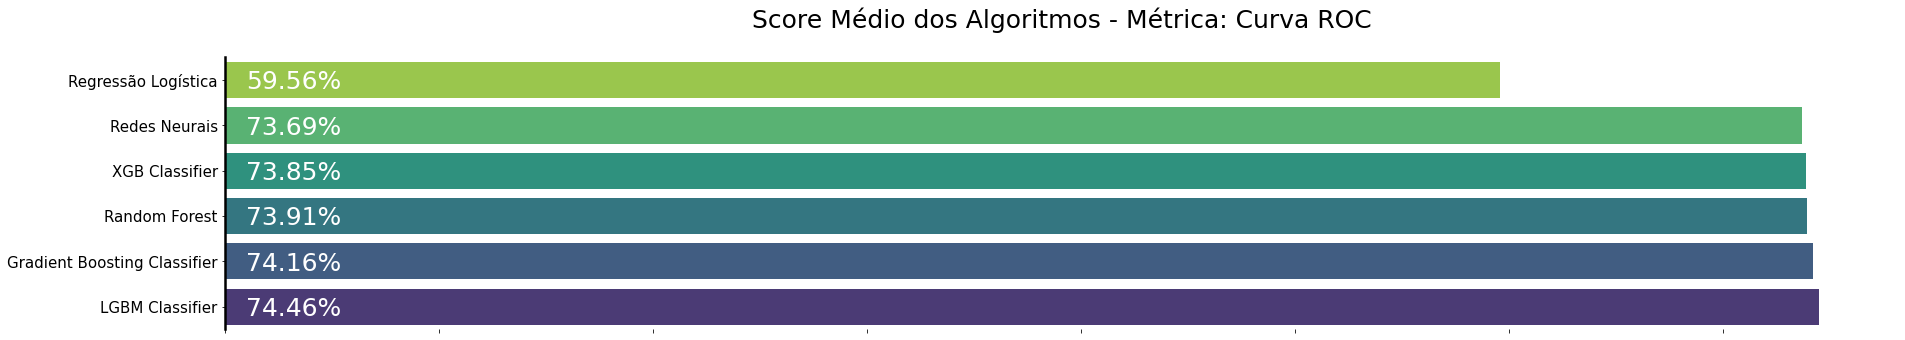

In [24]:
plotarGrafico('Curva ROC')

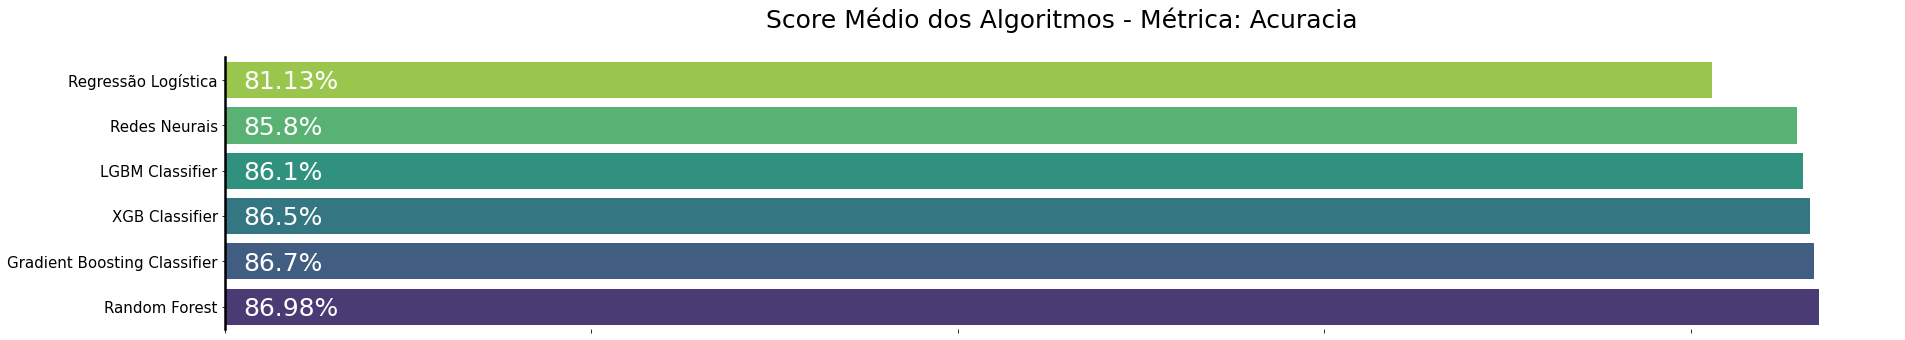

In [25]:
plotarGrafico('Acuracia')

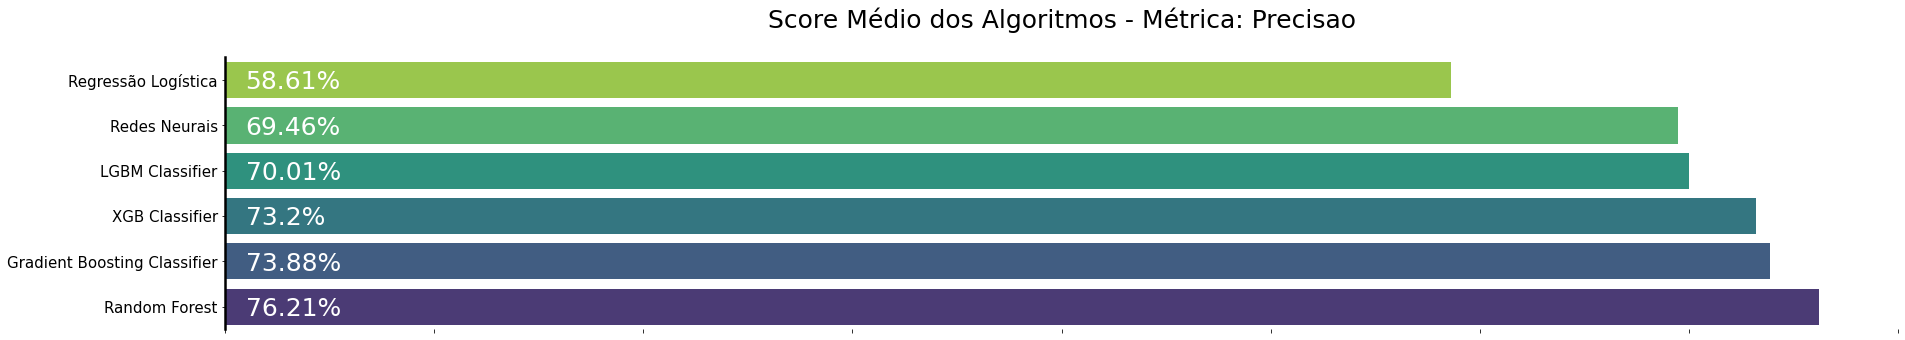

In [26]:
plotarGrafico('Precisao')

***


Podemos concluir que o algoritmo de **Regressão Logística** foi o que obteve o pior desempenho dos modelos aplicados.


***

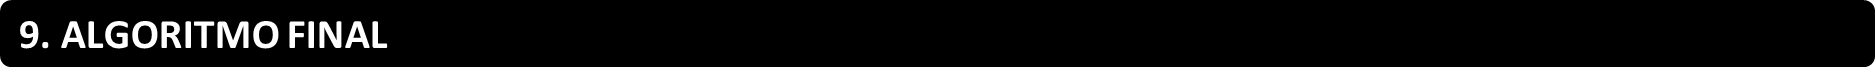

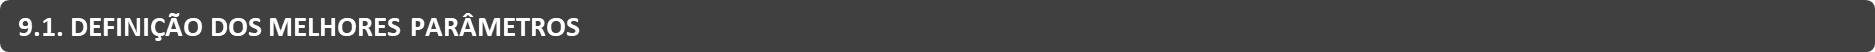

In [27]:
X = df_dummiesSS.drop(['Exited'], axis=1)
y = df_dummiesSS['Exited'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

n_arvores = range(200, 1100, 200)
minimo_amostras = range(2, 10, 2)

listaResultadosFinal = list()

for n in n_arvores:
    for mm in tqdm(minimo_amostras):
        modelo = RandomForestClassifier(n_estimators=n, random_state=0, n_jobs=-1, min_samples_leaf=mm, max_features=4)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)   
        score = roc_auc_score(y_test, y_pred)*100
        acuracia = accuracy_score(y_pred, y_test)*100
        precisao = precision_score(y_test, y_pred, average='binary')*100
        listaTemp = []
        listaTemp.extend([n, mm, score, acuracia, precisao])
        listaResultadosFinal.append(listaTemp)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.96s/it]


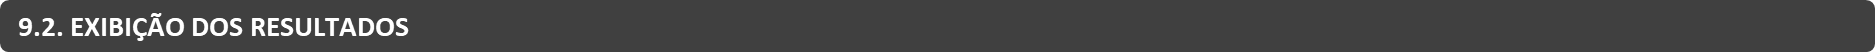

In [28]:
dfResultadosFinal = pd.DataFrame(listaResultadosFinal, columns=['Qtd. Arvores', 'Mínimo de Amostras', 'Curva ROC', 'Acuracia', 'Precisao'])
dfResultadosFinal.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Qtd. Arvores,200.000000,200.000000,200.000000,200.000000,400.000000,400.000000,400.000000,400.000000,600.000000,600.000000,600.000000,600.000000,800.000000,800.000000,800.000000,800.000000,1000.000000,1000.000000,1000.000000,1000.000000
Mínimo de Amostras,2.000000,4.000000,6.000000,8.000000,2.000000,4.000000,6.000000,8.000000,2.000000,4.000000,6.000000,8.000000,2.000000,4.000000,6.000000,8.000000,2.000000,4.000000,6.000000,8.000000
Curva ROC,74.192113,73.762917,74.074461,73.764852,73.821742,73.641395,73.951004,73.733504,73.976547,73.547351,73.733504,73.919656,73.884438,73.547351,74.011765,73.549286,74.039243,73.547351,74.011765,73.549286
Acuracia,86.750000,86.800000,87.150000,86.950000,86.600000,86.900000,87.100000,86.900000,86.700000,86.750000,86.900000,87.050000,86.700000,86.750000,87.050000,86.900000,86.800000,86.750000,87.050000,86.900000
Precisao,74.137931,75.268817,77.007299,76.277372,73.867596,76.190476,76.923077,76.000000,74.216028,75.362319,76.000000,76.642336,74.385965,75.362319,76.449275,76.383764,74.736842,75.362319,76.449275,76.383764


In [29]:
dfMedia1 = dfResultadosFinal.groupby('Qtd. Arvores'). mean().sort_values(by='Curva ROC').reset_index()
dfMedia2 = dfResultadosFinal.groupby(['Mínimo de Amostras']). mean().sort_values(by='Curva ROC').reset_index()
display(dfMedia1, dfMedia2)

,Qtd. Arvores,Mínimo de Amostras,Curva ROC,Acuracia,Precisao
0,800,5.0,73.748210,86.8500,75.645331
1,400,5.0,73.786911,86.8750,75.745287
2,1000,5.0,73.786911,86.8750,75.733050
3,600,5.0,73.794264,86.8500,75.555171
4,200,5.0,73.948585,86.9125,75.672855


,Mínimo de Amostras,Qtd. Arvores,Curva ROC,Acuracia,Precisao
0,4,600.0,73.609273,86.79,75.509250
1,8,600.0,73.703317,86.94,76.337447
2,6,600.0,73.956500,87.05,76.565785
3,2,600.0,73.982817,86.71,74.268872


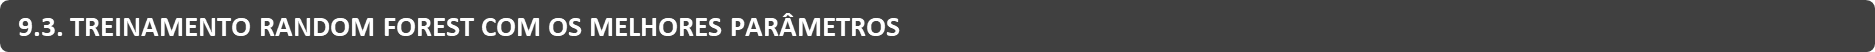

In [30]:
modeloFinal = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1, min_samples_leaf=6, max_features=4)
modeloFinal.fit(X_train, y_train)
y_pred = modeloFinal.predict(X_test)

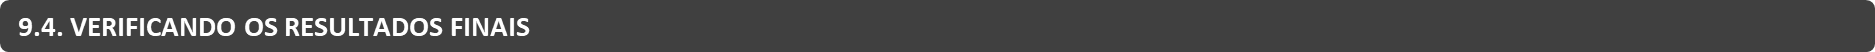

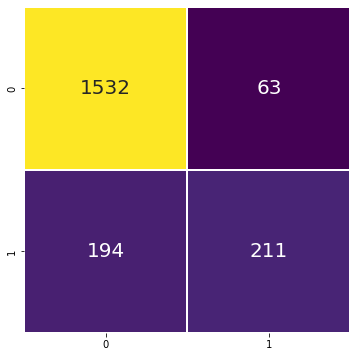

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='.4g', cbar=False, linewidths=0.25, annot_kws={'size': 20}, square=True, cmap='viridis');

In [32]:
print(classification_report(y, modelo.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7963
           1       0.86      0.54      0.66      2037

    accuracy                           0.89     10000
   macro avg       0.88      0.76      0.80     10000
weighted avg       0.89      0.89      0.88     10000



ROC AUC: 74.07446108595533


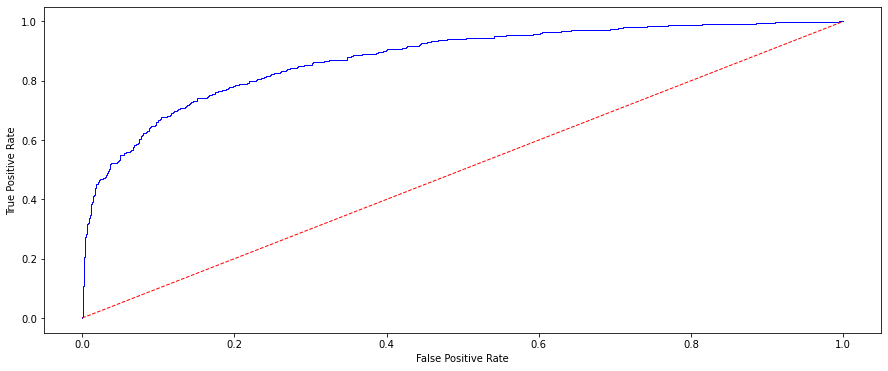

In [33]:
y_pred = modeloFinal.predict(X_test)
df_pred = pd.DataFrame({'Real': y_test.flatten(), 'Previsão': y_pred.flatten()})
df_pred.head(10)

print(f'ROC AUC: {roc_auc_score(y_test, y_pred)*100}')

y_probs = modeloFinal.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, lw=1, color='blue')
plt.plot([0,1], [0,1], lw=1, color='red', ls='--')
plt.xlabel('False Positive Rate', )
plt.ylabel('True Positive Rate');

***


* A Curva AUC-ROC é uma medida de desempenho para problemas de classificação em várias configurações de limiar.


* ROC é uma curva de probabilidade e AUC representa o grau ou a medida de separação. Com esta métrica podemos verificar o quão capaz de distinguir as diferentes classes o modelo é;


* Quanto maior for o valor da AUC melhor será o modelo em classificar corretamente as classes;


* Acima podemos observar a linha tracejada em vermelho que representa a *baseline*; Já a linha azul representa a Curva ROC.


***

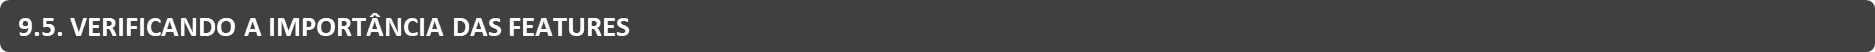

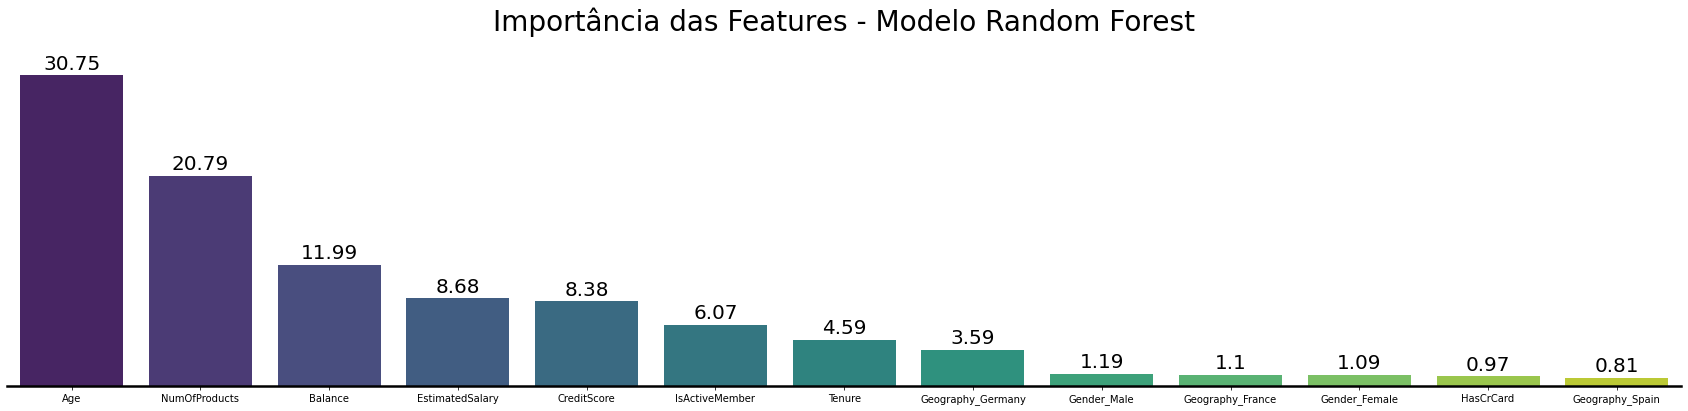

In [34]:
featureImportances = pd.DataFrame({'Value': (modeloFinal.feature_importances_)*100, 'Feature': X.columns})

fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(x='Feature', y='Value', data=featureImportances.sort_values(by='Value', ascending=False), palette='viridis')
plt.title('Importância das Features - Modelo Random Forest', fontsize=28, pad=30)

ax.set_ylabel(''), ax.set_xlabel('')
ax.tick_params(axis='y', labelleft=False, left=None)

for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.spines['bottom'].set_linewidth(2.5)

for i in ax.patches:
    ax.annotate(round(i.get_height(), 2),       
                (i.get_x() + i.get_width() / 2, i.get_height() + 0.55),
                ha='center', va='baseline',
                xytext=(0, 1), textcoords='offset points',
                fontsize=20)

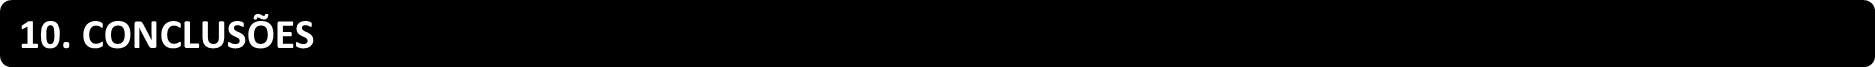

***


* Observamos que o algoritmo que obteve a melhor classificação média, entre as métricas utilizads, fora o Random Forest;


* Utilizamos como parâmetros a quantidade de árvore de 200, com o número máximo de 4 *features* por ciclo e mantendo um número mínimo de nós finais em 6; Com isso obtemos o melhor resultado;


* Não obtivemos uma grande diferença em relação aos três tipos de escalonamentos selecionados, portanto podemos conlcuir que para esta base de dados o escalonamento pode ser efetuado em quaisquer das técnicas utilizadas;


* A métrica Acurácia não é efetiva, ainda mais em razão da variável target estar completamente desbalanceda, com quase 80%. Ou seja, se o algoritmo classificar que nenhum cliente irá "deixar" o banco ele terá uma acurácia de 80%;


* Quanto a precisão, definida pela razão entre a quantidade de exemplos classificados corretamente como positivos e o total de exemplos dados como positivos, obtivemos um valor interessante para ambas as classes;


* Em relação à Curva ROC, o limiar de classificação pareceu satisfatório, obtendo um resultado de quase 75;


* Há mais testes que poderíamos ter feito, como por exemplo utilizarmos apenas as *features* ue obtiveram um melhor desempenho para treinar o modelo, ou até mesmo utilizarmos mais de um modelo para calcularmos o resultado médio (moda).


***

|                   Github                  |                   Linkedin                   |                    Kaggle                    |                 Email                |                 Site                |
|:-----------------------------------------:|:--------------------------------------------:|:--------------------------------------------:|:------------------------------------:|:------------------------------------:|
| [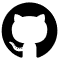](https://www.github.com/ThiagoFerreiraWD) | [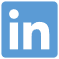](https://www.linkedin.com/in/tferreirasilva) | [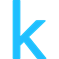](https://www.kaggle.com/thiagoferreirasilva) | [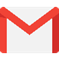](mailto:thiago.ferreirawd@gmail.com) | [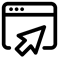](https://thiagoferreirads.com)